# Neural Networks

# Task 1: MLP For FashionMNIST

In [ ]:
# Creating the datasets
transform = torchvision.transforms.ToTensor() # feel free to modify this as you see fit.

training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

validation_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

100%|██████████| 26421880/26421880 [00:03<00:00, 8617707.24it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 146618.90it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2742243.36it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3930155.99it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
      super(Feedforward, self).__init__()
      self.input_size = input_size
      self.model = torch.nn.Sequential(
          torch.nn.Linear(input_size, hidden_size),
          torch.nn.ReLU(),
          torch.nn.Linear(hidden_size, 10),
          torch.nn.Sigmoid()
      )
      
    def forward(self, x):
        return self.model(x.view(10, self.input_size))

In [ ]:
torch.empty(3, dtype=torch.long).random_(5)

tensor([2, 0, 2])

In [ ]:
#device = torch.device("cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

epochs = 15
batch_size = 10
learning_rate = 0.15
hidden_size = 120

num_features = 28*28
model1 = Feedforward(num_features, hidden_size).to(device)
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()
trainDataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
valDataLoader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, shuffle=False)

train_loss_plt, val_loss_plt = [], []
train_acc_plt, val_acc_plt = [], []

model1.train() # Put model in training mode
for epoch in range(epochs):
    training_losses = []
    correct = 0 
    num_trained = 0
    for x, y in tqdm.tqdm_notebook(trainDataloader, unit="batch"):
        x, y = x.float().to(device), y.long().to(device)
        optimizer.zero_grad()
        pred = model1(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        training_losses.append(loss.item())
        correct += torch.sum(torch.argmax(pred, dim=1) == y).item()
        num_trained += len(y)
    train_loss_plt.append(np.mean(training_losses))
    train_acc_plt.append(correct/num_trained)
    print("Finished Epoch", epoch + 1, ", training loss:", train_loss_plt[-1], ", train accuracy:", train_acc_plt[-1])
        
    with torch.no_grad():
        model1.eval() # Put model in eval mode
        num_correct = 0
        num_trained = 0
        val_losses = []
        for x, y in valDataLoader:
            x, y = x.float().to(device), y.long().to(device)
            pred = model1(x)
            val_losses.append(criterion(pred, y).item())
            num_correct += torch.sum(torch.argmax(pred, dim=1) == y).item()
            num_trained += len(y)
        val_loss_plt.append(np.mean(val_losses))
        val_acc_plt.append(num_correct / num_trained)
        print("val loss:", val_loss_plt[-1],", val accuracy:", val_acc_plt[-1])
        model1.train() # Put model back in train mode

Using device cuda


<ipython-input-22-1e936486c389>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x, y in tqdm.tqdm_notebook(trainDataloader, unit="batch"):


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 1.672112384279569 , train accuracy: 0.48438333333333333
val loss: 1.6472192420959473 , val accuracy: 0.4823


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 1.6302379713455837 , train accuracy: 0.5503
val loss: 1.627548997402191 , val accuracy: 0.5866


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 1.6071819276014965 , train accuracy: 0.6349333333333333
val loss: 1.610765511751175 , val accuracy: 0.6437


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 1.5937333450516065 , train accuracy: 0.6690833333333334
val loss: 1.5999083145856858 , val accuracy: 0.7146


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 1.5873978530963262 , train accuracy: 0.6971333333333334
val loss: 1.5993269129991532 , val accuracy: 0.6936


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 1.5829767040610314 , train accuracy: 0.7042
val loss: 1.5928780258893966 , val accuracy: 0.7306


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 1.5797639474868774 , train accuracy: 0.7178
val loss: 1.5889718203544616 , val accuracy: 0.7043


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 1.576875020066897 , train accuracy: 0.7239333333333333
val loss: 1.5971064237356185 , val accuracy: 0.7129


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 1.5742736859321593 , train accuracy: 0.73495
val loss: 1.588284253835678 , val accuracy: 0.7269


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 1.5726906826694806 , train accuracy: 0.7275166666666667
val loss: 1.584499643445015 , val accuracy: 0.7314


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 1.570836984038353 , train accuracy: 0.7334166666666667
val loss: 1.5868993113040923 , val accuracy: 0.7396


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 1.5692422752579054 , train accuracy: 0.7564
val loss: 1.5860057238340377 , val accuracy: 0.7624


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 1.5620134929815928 , train accuracy: 0.8107333333333333
val loss: 1.5669759728908539 , val accuracy: 0.8533


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 1.5466172188719114 , train accuracy: 0.8649
val loss: 1.5608561276197432 , val accuracy: 0.8492


  0%|          | 0/6000 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 1.5437547980149586 , train accuracy: 0.8674833333333334
val loss: 1.5584946945905684 , val accuracy: 0.8584


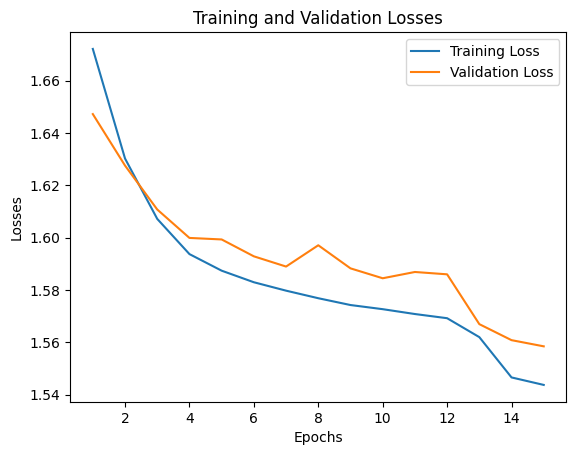

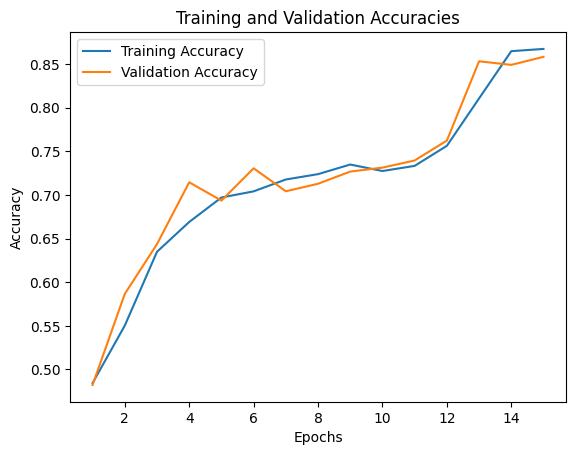

In [ ]:
plt.plot(range(1, epochs + 1), train_loss_plt, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss_plt, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


plt.plot(range(1, epochs + 1), train_acc_plt, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc_plt, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

# Task 2: CNNs for CIFAR-10

In [ ]:


transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(32, padding=4),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_data = torchvision.datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform,
)
# If you make a train-test partition it is up to you.

100%|██████████| 170498071/170498071 [00:14<00:00, 12072466.96it/s]


Extracting data/cifar-10-python.tar.gz to data


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader

In [2]:
#Architechture inspired by: https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec
#and https://towardsdatascience.com/resnets-for-cifar-10-e63e900524e0 

class FullPreBlock(nn.Module):
#Full Pre-activation Residual Block
    def __init__(self, in_channels, out_channels, stride=1):
        super(FullPreBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.reshape_skip = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.reshape_skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        skip = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.reshape_skip(skip)
        out = self.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)

        self.layer1 = self.make_layer(block, 16, stride=1)
        self.layer2 = self.make_layer(block, 32, stride=2)
        self.layer3 = self.make_layer(block, 64, stride=2)
        self.layer4 = self.make_layer(block, 128, stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, num_classes)

    def make_layer(self, block, out_channels, stride):
        layer = nn.Sequential(
            block(self.in_channels, out_channels, stride=stride),
            block(out_channels, out_channels, stride=1)
        )
        self.in_channels = out_channels
        return layer

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = nn.ReLU(inplace=True)(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [3]:
# Creating the datasets, feel free to change this as long as you do the same to the test data.
# You can also modify this to split the data into training and validation.
# See https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='data', train=True, download=True, transform=transform_train)

trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])

trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
valloader = DataLoader(valset, batch_size=128, shuffle=False, num_workers=2)
#testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:02<00:00, 78071484.07it/s] 


Extracting data/cifar-10-python.tar.gz to data


In [13]:
#Architechture inspired by: https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec
#and https://towardsdatascience.com/resnets-for-cifar-10-e63e900524e0 

class FullPreBlock(nn.Module):
#Full Pre-activation Residual Block
    def __init__(self, in_channels, out_channels, stride=1):
        super(FullPreBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.reshape_skip = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.reshape_skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        skip = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.reshape_skip(skip)
        out = self.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)

        self.layer1 = self.make_layer(block, 16, stride=1)
        self.layer2 = self.make_layer(block, 32, stride=2)
        self.layer3 = self.make_layer(block, 64, stride=2)
        self.layer4 = self.make_layer(block, 128, stride=2)
        self.layer5 = self.make_layer(block, 256, stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, block, out_channels, stride):
        layer = nn.Sequential(
            block(self.in_channels, out_channels, stride=stride),
            block(out_channels, out_channels, stride=1)
        )
        self.in_channels = out_channels
        return layer

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = nn.ReLU(inplace=True)(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = ResNet(FullPreBlock, num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model1.parameters(), lr=0.1, momentum=0.8, weight_decay=8e-4)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

train_losses, train_accs = [], []
val_losses, val_accs = [], []

for epoch in range(100):
    loss_epoch = 0.0
    train_total = 0
    train_correct = 0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        correct = torch.sum(torch.argmax(outputs, dim=1) == labels).item()
        #print("acc:", correct/labels.size(0))
        train_total += labels.size(0)
        train_correct += correct

        loss_epoch += loss.item()
    print('[Epoch %d] train acc: %.3f, train loss: %.3f' % (epoch + 1, train_correct / train_total, loss_epoch / len(trainloader)))
    train_losses.append(loss_epoch / len(trainloader))
    train_accs.append(train_correct / train_total)

    model1.eval()
    val_correct = 0
    val_total = 0
    loss_epoch = 0.0
    for inputs, labels in valloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss_epoch += loss.item()
        val_total += labels.size(0)
        val_correct += torch.sum(torch.argmax(outputs, dim=1) == labels).item()
    print("Val acc:", val_correct / val_total, ", val loss:", loss_epoch / len(valloader))
    val_losses.append(loss_epoch / len(valloader))
    val_accs.append(val_correct / val_total)
    model1.train()

    scheduler.step()
    

print('Finished Training')


[Epoch 1] train acc: 0.350, train loss: 1.759
Val acc: 0.4384 , val loss: 1.5162518899652022
[Epoch 2] train acc: 0.482, train loss: 1.412
Val acc: 0.5355 , val loss: 1.2798592274702048
[Epoch 3] train acc: 0.575, train loss: 1.173
Val acc: 0.5672 , val loss: 1.2480689038204242
[Epoch 4] train acc: 0.643, train loss: 0.998
Val acc: 0.6072 , val loss: 1.1161509133592438
[Epoch 5] train acc: 0.689, train loss: 0.878
Val acc: 0.6561 , val loss: 1.0212657300731804
[Epoch 6] train acc: 0.725, train loss: 0.783
Val acc: 0.636 , val loss: 1.084027558187895
[Epoch 7] train acc: 0.748, train loss: 0.723
Val acc: 0.7025 , val loss: 0.8485917660254466
[Epoch 8] train acc: 0.768, train loss: 0.670
Val acc: 0.7154 , val loss: 0.8421176845514322
[Epoch 9] train acc: 0.777, train loss: 0.647
Val acc: 0.7335 , val loss: 0.800291445436357
[Epoch 10] train acc: 0.790, train loss: 0.610
Val acc: 0.7343 , val loss: 0.792079971560949
[Epoch 11] train acc: 0.796, train loss: 0.597
Val acc: 0.7307 , val loss

Congrats! You made it to the end.

In [18]:
import matplotlib
from matplotlib import pyplot as plt

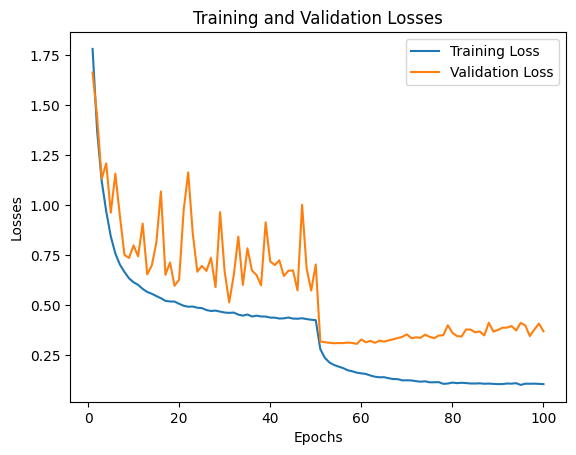

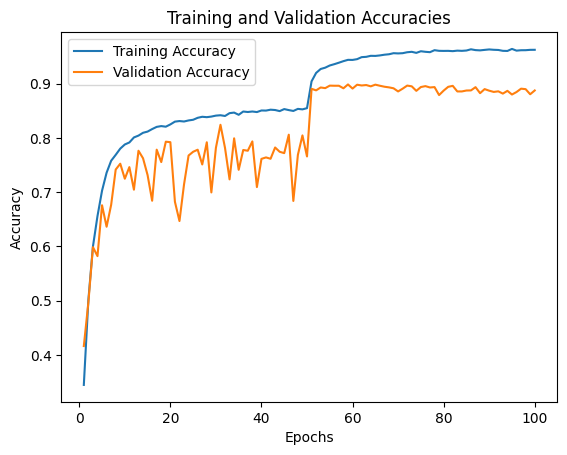

In [19]:
plt.plot(range(1, 100 + 1), train_losses, label='Training Loss')
plt.plot(range(1, 100 + 1), val_losses, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


plt.plot(range(1, 100 + 1), train_accs, label='Training Accuracy')
plt.plot(range(1, 100 + 1), val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

### Kaggle Submission
The following code is for you to make your submission to kaggle. Here are the steps you must follow:

1. Upload `cifar_test_data.npy` to the colab notebook by going to files on the right hand pane, then hitting "upload". 
2. Run the following cell to generate the dataset object for the test data. Feel free to modify the code to use the same transforms that you use for the training data. By default, this will re-use the `transform` variable.
3. In the second cell, write code to run predictions on the testing dataset and store them into an array called `predictions`.
4. Run the final cell which will convert your predictions array into a CSV for kaggle.
5. Go to the files pane again, and download the file called `submission.csv` by clicking the three dots and then download.


In [20]:
from PIL import Image
import numpy as np
import os

class CIFAR10Test(torchvision.datasets.VisionDataset):
    
    def __init__(self, transform=None, target_transform=None):
        super(CIFAR10Test, self).__init__(None, transform=transform,
                                      target_transform=target_transform)
        assert os.path.exists("cifar10_test_data_sp23.npy"), "You must upload the test data to the file system."
        self.data = [np.load("cifar10_test_data_sp23.npy", allow_pickle=False)]

        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))  # convert to HWC

    def __getitem__(self, index: int):
        img = self.data[index]
        img = Image.fromarray(img)
        if self.transform is not None:
            img = self.transform(img)
        return img

    def __len__(self) -> int:
        return len(self.data)

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
testset = CIFAR10Test(transform=transform_test)
testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [21]:
model1.eval()
predictions = np.array([])
for data in testloader:
    outputs = model1(data.to(device))
    predictions = np.hstack((predictions, torch.argmax(outputs, dim=1).to('cpu').numpy()))
model1.train()

#predictions = torch.argmax(model(data.to(device)), dim=1).to('cpu').numpy()
print(predictions)

[2. 8. 0. ... 9. 4. 9.]


In [ ]:
import pandas as pd

if isinstance(predictions, np.ndarray):
    predictions = predictions.astype(int)
else:
    predictions = np.array(predictions, dtype=int)
#assert predictions.shape == (len(testing_data),), "Predictions were not the correct shape"
df = pd.DataFrame({'Category': predictions})
df.index += 1  # Ensures that the index starts at 1. 
df.to_csv('submission.csv', index_label='Id')